# UX7 Comparing Values

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning goals

After working your way through this notebook you should be able to..
- Compare between and within group designs
- Explain the different assumptions for for parametric tests
- Choose the appropriate t-test for your data


## Table of Contents
- [1 Parametric Data](#parametric)
    - [1.1 Student t-test](#studentttest)
- [2. Within Group Design](#WithinGroup)
    - [2.1 T-test for two related samples](#relttest)
    - [2.2 Normality Assumption for paired sample t-test](#Normality)
- [3. Between Group Design](#BetweenGroup)    
    - [3.1 Assumptions for independent t-tests](#IndepAssumptions)
    - [3.2 Equal Variance](#EqualVariance)
    - [3.3 T-test for two independent samples](#Indepttest)
- [4. Apply Caution and Common Sense](#CommonSense)

<a id= 'Descriptive'> </a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

<a id= 'parametric'> </a>


## 1. Parametric Data
Parametric tests have *more statistical power* than tests for non-normal distributions. That is, given a specific alpha-level, we are more likely to detect a real change with smaller sample sizes when we use parametric tests compared to when we use non-parametric tests.

So there are plenty of reasons for us to want parametric data. However, we cannot just go ahead and use them for any type of data. We have to check that our data fulfill some assumptions, if we wish to use the parametric tests.

The assumptions are based on the knowledge that parametric tests use the (arithmetic) mean and variance - characteristics that describe the normal distribution. It is therefore important for us to ensure that these measures are meaningful and accurate enough **for our data**. Otherwise the parametric tests will not owrk as intended. That is, we can still run the parametric test functions, but cannot trust the results that they yield. 

The assumptions vary with  
- The type of test design
- The type of test

Although the test design can be more complex, we will here concentrate on the two most common. That is comparing *between two groups of users* ("Between group design"), and comparing differences between two conditions *for the same user* ("Within group desing")


<a id= 'studentttest'> </a>

### 1.1 Student t-test


We have already encountered the t-distribution and the single sample t-test. You may recall, that the t-distribution is similar to the normal distribution, but wider and flatter to compensate for the fact that samples underestimate the variability in the true population.

For the t-test, the degrees of freedom (df or DoF) refer to the values in the sample size number that are free to vary once the means are known. Because the true population mean $\mu$ and variance $\sigma^2$
are unknown, one degree must be "sacrificed" to estimate the mean when estimating variability. The larger the sample, the more similar the t-distribution becomes to a normal distribution.

As a rule of thumb, you can calculate the degrees of freedom as the sample size $N$ minus the number of sample groups. In the case of single sample t-test, there is only one group so df = N - 1. When you have
two groups to compare, two mean values need to be estimated, and thus df = N - 2.

<a id= 'WithinGroup'> </a> 

## 2. Within group design

Individual differences between users typically add a lot of unsystematic variance because scores may be affected by personal experience, preferences, and the like. One way to reduce this effect on the dependent measure is to let the same participants be in both experimental and control conditions. To avoid any systematic order effects that we are not interested in, it is very important that we *counter balance* (alternate) the order for different participants.

![](./UXfigures/WithinGroupDesign.png "Title")

In within group, or **repeated measures** design, we have two samples that are *dependent*
because they come from the same individuals (who are participating in all experimental conditions). Therefore, their individual quirks or skills matter less since we compare each user to themselves. 

<a id= 'relttest'> </a> 


### 2.1  t-test for two related samples
The null hypothesis would be that there are no significant differences between the conditions, and so the
t-statistic is calculated to test the *difference* between the paired scores in the two cases. This test is also called **paired samples t-test** and is, in principle, the same as a single sample t-test but with $\mu_{expected}$  always zero.

Why is that? Well, we have some knowledge of what could be expected if there is no effect of which condition/design the users try. In that case, the paired scores should be approximately equal, yielding a difference of zero. So our t statistic is calculated

$$t  =\frac {\bar{D}} {\sqrt{\frac{{s_D}^2}{n}}}$$

Where $\bar{D}$ is the *difference between the scores for a particular user in the different conditions* and $s_D$ the standard deviation of these scores.

Note that even if the rationale is similar, one cannot use the same function call for related samples as one would for a single sample t-test. It would not do the right comparison.

In [2]:
# We generate some data
K=30
Romb=np.random.normal(3.8,3,K)
Elipse=np.random.normal(4.9,3,K)

D=Romb-Elipse

### Try out 1: 
Plot the histogram of the difference between scores for the two designs (Romb and Elipse).

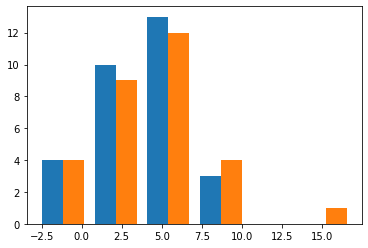

In [3]:
# Modify the below code so that instead of two histograms it shows the histogram of differences between data points

plt.hist([Romb,Elipse], bins=6)
plt.show()

<a id= 'Normality'> </a> 

### 2.2 Normality Assumption for paired sample t-test

The related, or paired sample t-test is a parametric test and it assumes data to be from a normal distribution. It is therefore a good idea to plot data and check if this assumption is fulfilled. 

Above we plotted histograms of data and this can be a good start, but also deceptive. What we are trying to determine is the type of distribution of *the population* that the sample was drawn from. It is not easy to determine the shape of the distribution based on a histogram. Especially for smaller sample sizes, the histogram shape can vary a lot, and is also dependent on the number of frequency bins (value ranges) used to display the data. But we can also use other ways to look at the data and test the assumption. 

#### QQ-plots
QQ plots show the actual data points plotted against what could be expected if they had been drawn from a population with normal distribution. This is done by ordering the values against the theoretical quantiles. Ideally, the points should all line up along the diagonal. It is seldom seen that they do so perfectly, but when the data is offset too much, wiggles around the line, or forms an s-shape around the line, there is reason for caution. 

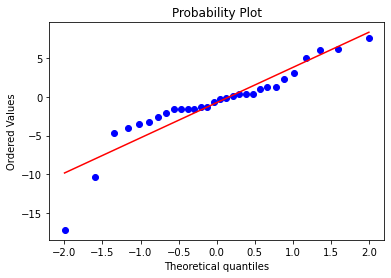

In [4]:
# Use stats.probplot to make a qq-plot
stats.probplot(D, plot=plt);


#### Normality tests
There are several tests for normality, one being the Shapiro-Wilk test. In the help information for the function we can read that "The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution."

So to test whether we can use parametric tests, we actually use other statistical tests. And just like the statistical tests we want to use for our main hypothesis, we also need to be a bit careful about the use and interpretation of these tests. 


### Try out 2: 
Check the hypothesis of the Shapiro-Wilk test. Perform the test for the diffrence between design Romb and Elipse scores.

In [10]:
# Shapiro-Wilk normality test for difference scores 
help(stats.shapiro)
stats.shapiro(D)


Help on function shapiro in module scipy.stats.morestats:

shapiro(x)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    
    Returns
    -------
    statistic : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.
    
    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.
    
    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is accurate
    but the p-value may not be.
    
    The chance of rejecting the null hypothesis when it is true is close to 5%
    regardless of sample size.
    
    References
    ----------
    .. [1] https://www.itl.nist.

ShapiroResult(statistic=0.8758091330528259, pvalue=0.0022621594835072756)

The test statistic for this test (and other tests of parametric daata) is something we may report together with the p-value when writing that we tested for normality, so that others can check up on whether it was correct. Otherwise we do not use it much.


### Try out 3: 
Perform a related t-test on the designs Romb and Elipse scores as if they were collected from the same participant.

In [6]:
# For a related t-test the function is :
# help(stats.ttest_rel)


<a id= 'BetweenGroup'> </a>

## 3. Between Group design

Although within group designs solves many things there are also drawbacks. One is that for each participant the experiment can become quite lengthy. Another is that it can be very tricky to avoid some of the order effects. For instance, participants get more tired or trained as the test proceeds. In some cases we are also interested in participants' first immediate reaction - and asking them several times for different designs will not give the right result. So in many instances, we want the data for the different conditions to be *independent*. 
We can achieve this by randomly assigning participants to do either an experimental or a control condition.

![](./UXfigures/BetweenGroupDesign.png "Title")


<a id= 'IndepAssumptions'> </a>

### 3.1 Assumptions for independent t-tests

Before we can apply the independent t-test we have a few more assumptions about our data to check: 

- Representativeness: The samples are representative of their respective population

- Independence: The values in the two samples are not related

- Normality: Both samples are (approximately) normally distributed 

- Homogeneity of variances: Variances should be approximately equal for the two samples 


So in addition to the normality check we did above, we also should spend some thought about whether our data scores for the different groups are independent (that is, come from different users)? And are the scores representative for their respective population? Can we consider the variances (standard deviations) of the two groups to be approximately equal? 

<a id= 'EqualVariance'> </a>

### 3.2 Equal variance
An important assumption is that the data has (approximately) equal variance. This is important because **the variance says something about the precision of the mean**, and so it is not ideal for different groups we compare to have different mean measurement precisions. 

This is also an assumption that is easily violated when using small sample sizes. This is logical, because the larger the sample, the more similar the sample variance will be to the true variance of the population. For the same reason, unequal sample sizes (that is different amount of users in the two groups) may also make this a problem.

We can get an idea about the spread of the data from histograms and box plots. Box plots quickly visualize where the majority of data points are, and whether there are outliers.

#### Levene test
We can also use a test such as the Levene test. This also tests a hypothesis (they all do) so again it is a good idea to check the 'help' of a function to know how the hypothesis is formulated. 


In [7]:
# Levene variance test for the two groups, use .dropna() to exclude NaN values
stats.levene(Romb, Elipse)

#help(stats.levene) #to check details

LeveneResult(statistic=0.46865527594203005, pvalue=0.4963330482184527)

How should the output be interpreted? The p-value gives the probability that the two samples come from populations with equal variances. You can go to the top and check whether the result here matches what was entered in the generation of the data (above Try out 1). 


### Try out 4
Lower the sample size for Romb and Elipse but keep standard deviation the same. Does the output of Levene test suggest another interpretation now?


### Try out 5: 
Does this data fulfil the assumptions for parametric tests? Plot the data and perform tests for normality and equal variances as above. Change K so that sample sizes are 

- 20
- 100
- 1000

Also plot histograms of the data.

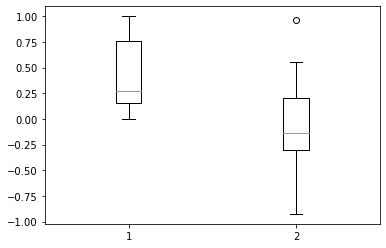

In [8]:
# Does this data fulfil the assumptions for an independent t-test?

K=20 # variable for sample size
Group1=np.random.beta(0.4,0.5,K)
Group2=np.random.normal(0.01,0.5,K)

# plot box plots
plt.boxplot([Group1,Group2])
plt.show()
# plot qq-plots and perform tests for normality and equal variance
#

<a id= 'Indepttest'> </a>

### 3.3 T-test for two independent samples

After checking that it is indeed the independent t-test we should do we can proceed with selecting the right function. 
The t-statistic for *two independent samples* is a ratio. The t-value is calculated as the
difference (in means) *between* groups divided by the variability
*within* groups:
$$t  =\frac {\bar{x}_1-\bar{x}_2} {\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

Where $\bar{x}_1$ and $\bar{x}_2$ are sample means and the sample
variance $s^2$ for each group is calculated as: 

$$s^2  =\frac {\sum_i^N{ (x_i-\bar{x})^2}} {n-1}$$



### Try out 6: 
Perform an independent t-test with the data for Groups 1 and 2 (as generated above). What does the output mean?

In [9]:
# First check 
# help(stats.ttest_ind)

# Modify this call to get the output of the test
# stats.ttest_ind()

<a id= 'NormalDist'> </a>

<a id= 'CommonSense'> </a>

## 4. Apply Caution and Common Sense

As mentioned above, there are some benefits of both plotting and testing - but also several things to be aware of. Histograms do not give a good idea of normality for small sample sizes, and it is difficult to know *how* much of a difference from normal is "acceptable". Here, the tests can help. However, as the power of a test is dependent on sample size, even small deviations in large sample sizes can light up the "significant"-flag, implying that data is significantly different from normally distributed data. Like for any other statistical test, we also accept a certain probability of making Type I (and Type II) errors.

On the one hand, normally distributed data is perhaps not as commonly occuring as we would like it to be (for instance we know to expect taks times to be skewed). On the other hand, t-tests are also known to be robust enough to handle that data does not fully tick off all assumptions, for instance normality. It may be more severe with violation of unequal variances between samples, especially when the sample sizes are unequal. Small differences are typically ok.

If plots, tests, and your common sense cannot defend using parametric tests there are other *non parametric tests* that do not make assuptions about the population. 

### Try out 7

The data used for the exercises here above have random variability and will change as they are newly drawn each time you assign values to Romb, and Elipse or Group 1 and 2. Run through the code for independent and dependent t-tests and see how much the result differs between new samples. Also change the sample size. 

Note how comparably small effect sizes are more likely to come out as significant as the sample size increases due to increased power (compare below 30 with 300 and 3000 for example). 